## Index of Economic Freedom

In this notebook I want to conduct some exploratory data analysis. My aim is to create some plots for the data and make sense of the output to find out more about potential correlations between the variables.

### Contents of this Notebook
#### 01. Importing libraries
#### 02. Importing dataframe
#### 03. Correlation heatmap with seaborn
#### 04. Scatterplots with seaborn
#### 05. Pair plots with seaborn
#### 06. Correlation matrix with pandas
#### 07. Categorical plots with seaborn
#### 08. Synopsis of the exploratory analysis
#### 09. Exporting the dataframe

### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts created are displayed without the need to "call" them specifically

%matplotlib inline

### 02. Importing dataframe

In [4]:
df_freedom = pd.read_excel(r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Prepared Data\data-economic-freedom-lat-long-noform.xlsx', index_col=False)

In [5]:
df_freedom.shape

(5152, 17)

In [6]:
df_freedom.head()

,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,33.939110,67.709953,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0
2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0
3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0
4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0


### 03. Correlation heatmap with seaborn

In [7]:
# Creating a subset excluding columns that are not pertinent

sub = df_freedom[['Overall Score','Property Rights', 'Government Integrity', 'Judicial Effectiveness', 'Tax Burden', 'Government Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom', 'Financial Freedom']]

In [8]:
sub

,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0
2,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0
3,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0
4,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,59.8,50.0,10.0,NaN,80.0,76.1,NaN,85.0,NaN,52.0,65.0,50.0,70.0
5148,41.7,10.0,10.0,NaN,68.8,87.1,NaN,40.0,NaN,55.2,44.6,30.0,30.0
5149,49.8,30.0,10.0,NaN,78.2,73.4,NaN,70.0,NaN,41.8,45.0,70.0,30.0
5150,55.1,50.0,30.0,NaN,72.4,74.8,NaN,55.0,NaN,12.2,61.2,70.0,70.0


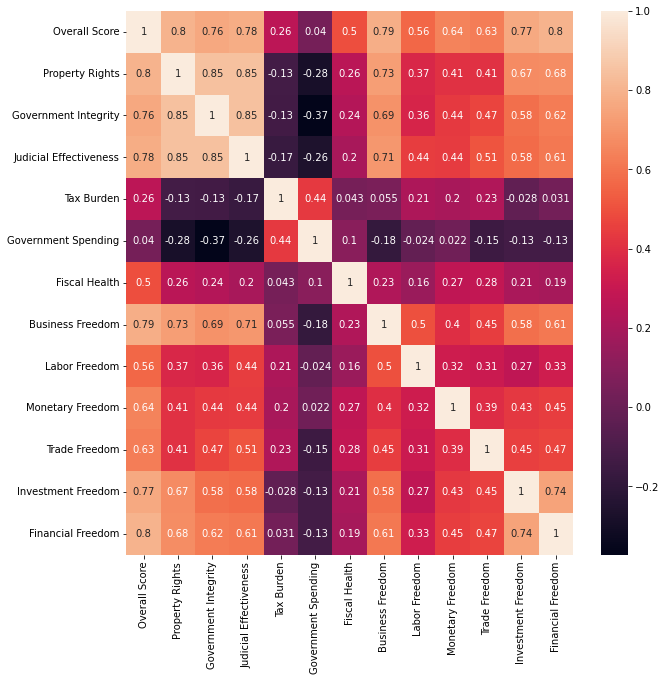

In [9]:
# Creating a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
                                                      # place the correlation coefficients onto the heatmap.

**Property Rights**, **Judicial Effectiveness**, **Government Integrity**, **Business Freedom**, **Investment Freedom** and **Financial Freedom** show the most and strongest correlations (6 or more with a coefficient higher than 0,5).

These variables should be further investigated. 

### 04. Scatterplots with seaborn

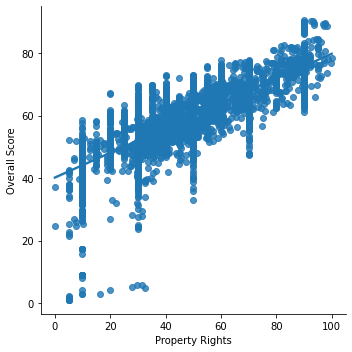

In [10]:
# Creating a scatterplot for "Property Rights" (x) and "Overall Score" (y)

sns.lmplot(x = 'Property Rights', y = 'Overall Score', data = sub)

The trend line is relatively steep and most of the points are fairly close to the line with the exception of points where the property rights factor is smaller than 40. But, there is also some data variability above and especially below the trend line. The trend doesn't seem to be purely linear, i.e., the data doesn't only trend in a single direction.

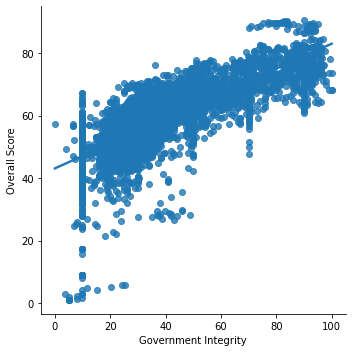

In [11]:
# Creating a scatterplot for "Government Integrity" (x) and "Overall Score" (y)

sns.lmplot(x = 'Government Integrity', y = 'Overall Score', data = sub)

The trend line is as steep as in the previous scatterplot and most of the points are fairly close to the line again. But, there seems to be greater variability in the "Government Integrity" scoring between 20 and 50 and also between 70 and 100. The trend doesn't seem to be purely linear, i.e., the data doesn't only trend in a single direction, and there is a greater data variance.

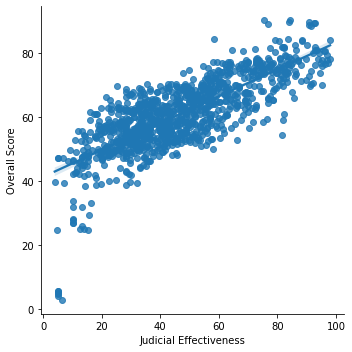

In [12]:
# Creating a scatterplot for "Judicial Effectiveness" (x) and "Overall Score" (y)

sns.lmplot(x = 'Judicial Effectiveness', y = 'Overall Score', data = sub)

The trend line is as steep as in the previous scatterplots but this time the data is closer to the line. The data has lesser variance and shows a more visible trend. However, we must remember that the data for "Judicial Effectiveness” is N/A for 2016 and earlier, so this factor might only be useful for an analysis of more recent years.

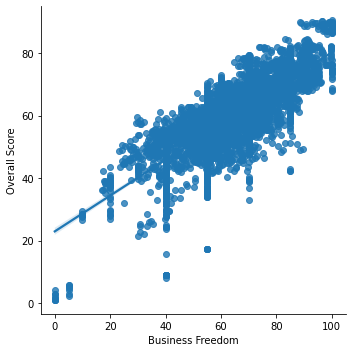

In [13]:
# Creating a scatterplot for "Business Freedom" (x) and "Overall Score" (y)

sns.lmplot(x = 'Business Freedom', y = 'Overall Score', data = sub)

The trend line is as steep as in the previous scatterplots and most of the points are fairly close to the line again. But, there seems to be greater variability in the "Business Freedom" scoring between 40 and 90. The trend doesn't seem to be purely linear, i.e., the data doesn't only trend in a single direction, and there is visible data variance.

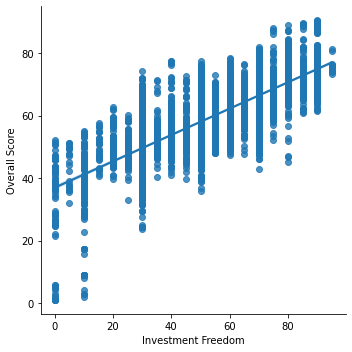

In [14]:
# Creating a scatterplot for "Investment Freedom" (x) and "Overall Score" (y)

sns.lmplot(x = 'Investment Freedom', y = 'Overall Score', data = sub)

The trend line is as steep as in the previous scatterplots but the data shows a pattern that suggest that the trend isn't linear, i.e., the data doesn't only trend in a single direction.

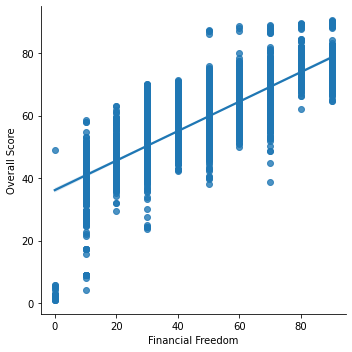

In [15]:
# Creating a scatterplot for "Financial Freedom" (x) and "Overall Score" (y)

sns.lmplot(x = 'Financial Freedom', y = 'Overall Score', data = sub)

The trend line is as steep as in the previous scatterplots but the data shows a pattern that suggest that the trend isn't linear, i.e., the data doesn't only trend in a single direction.

### 05. Pair plots with seaborn

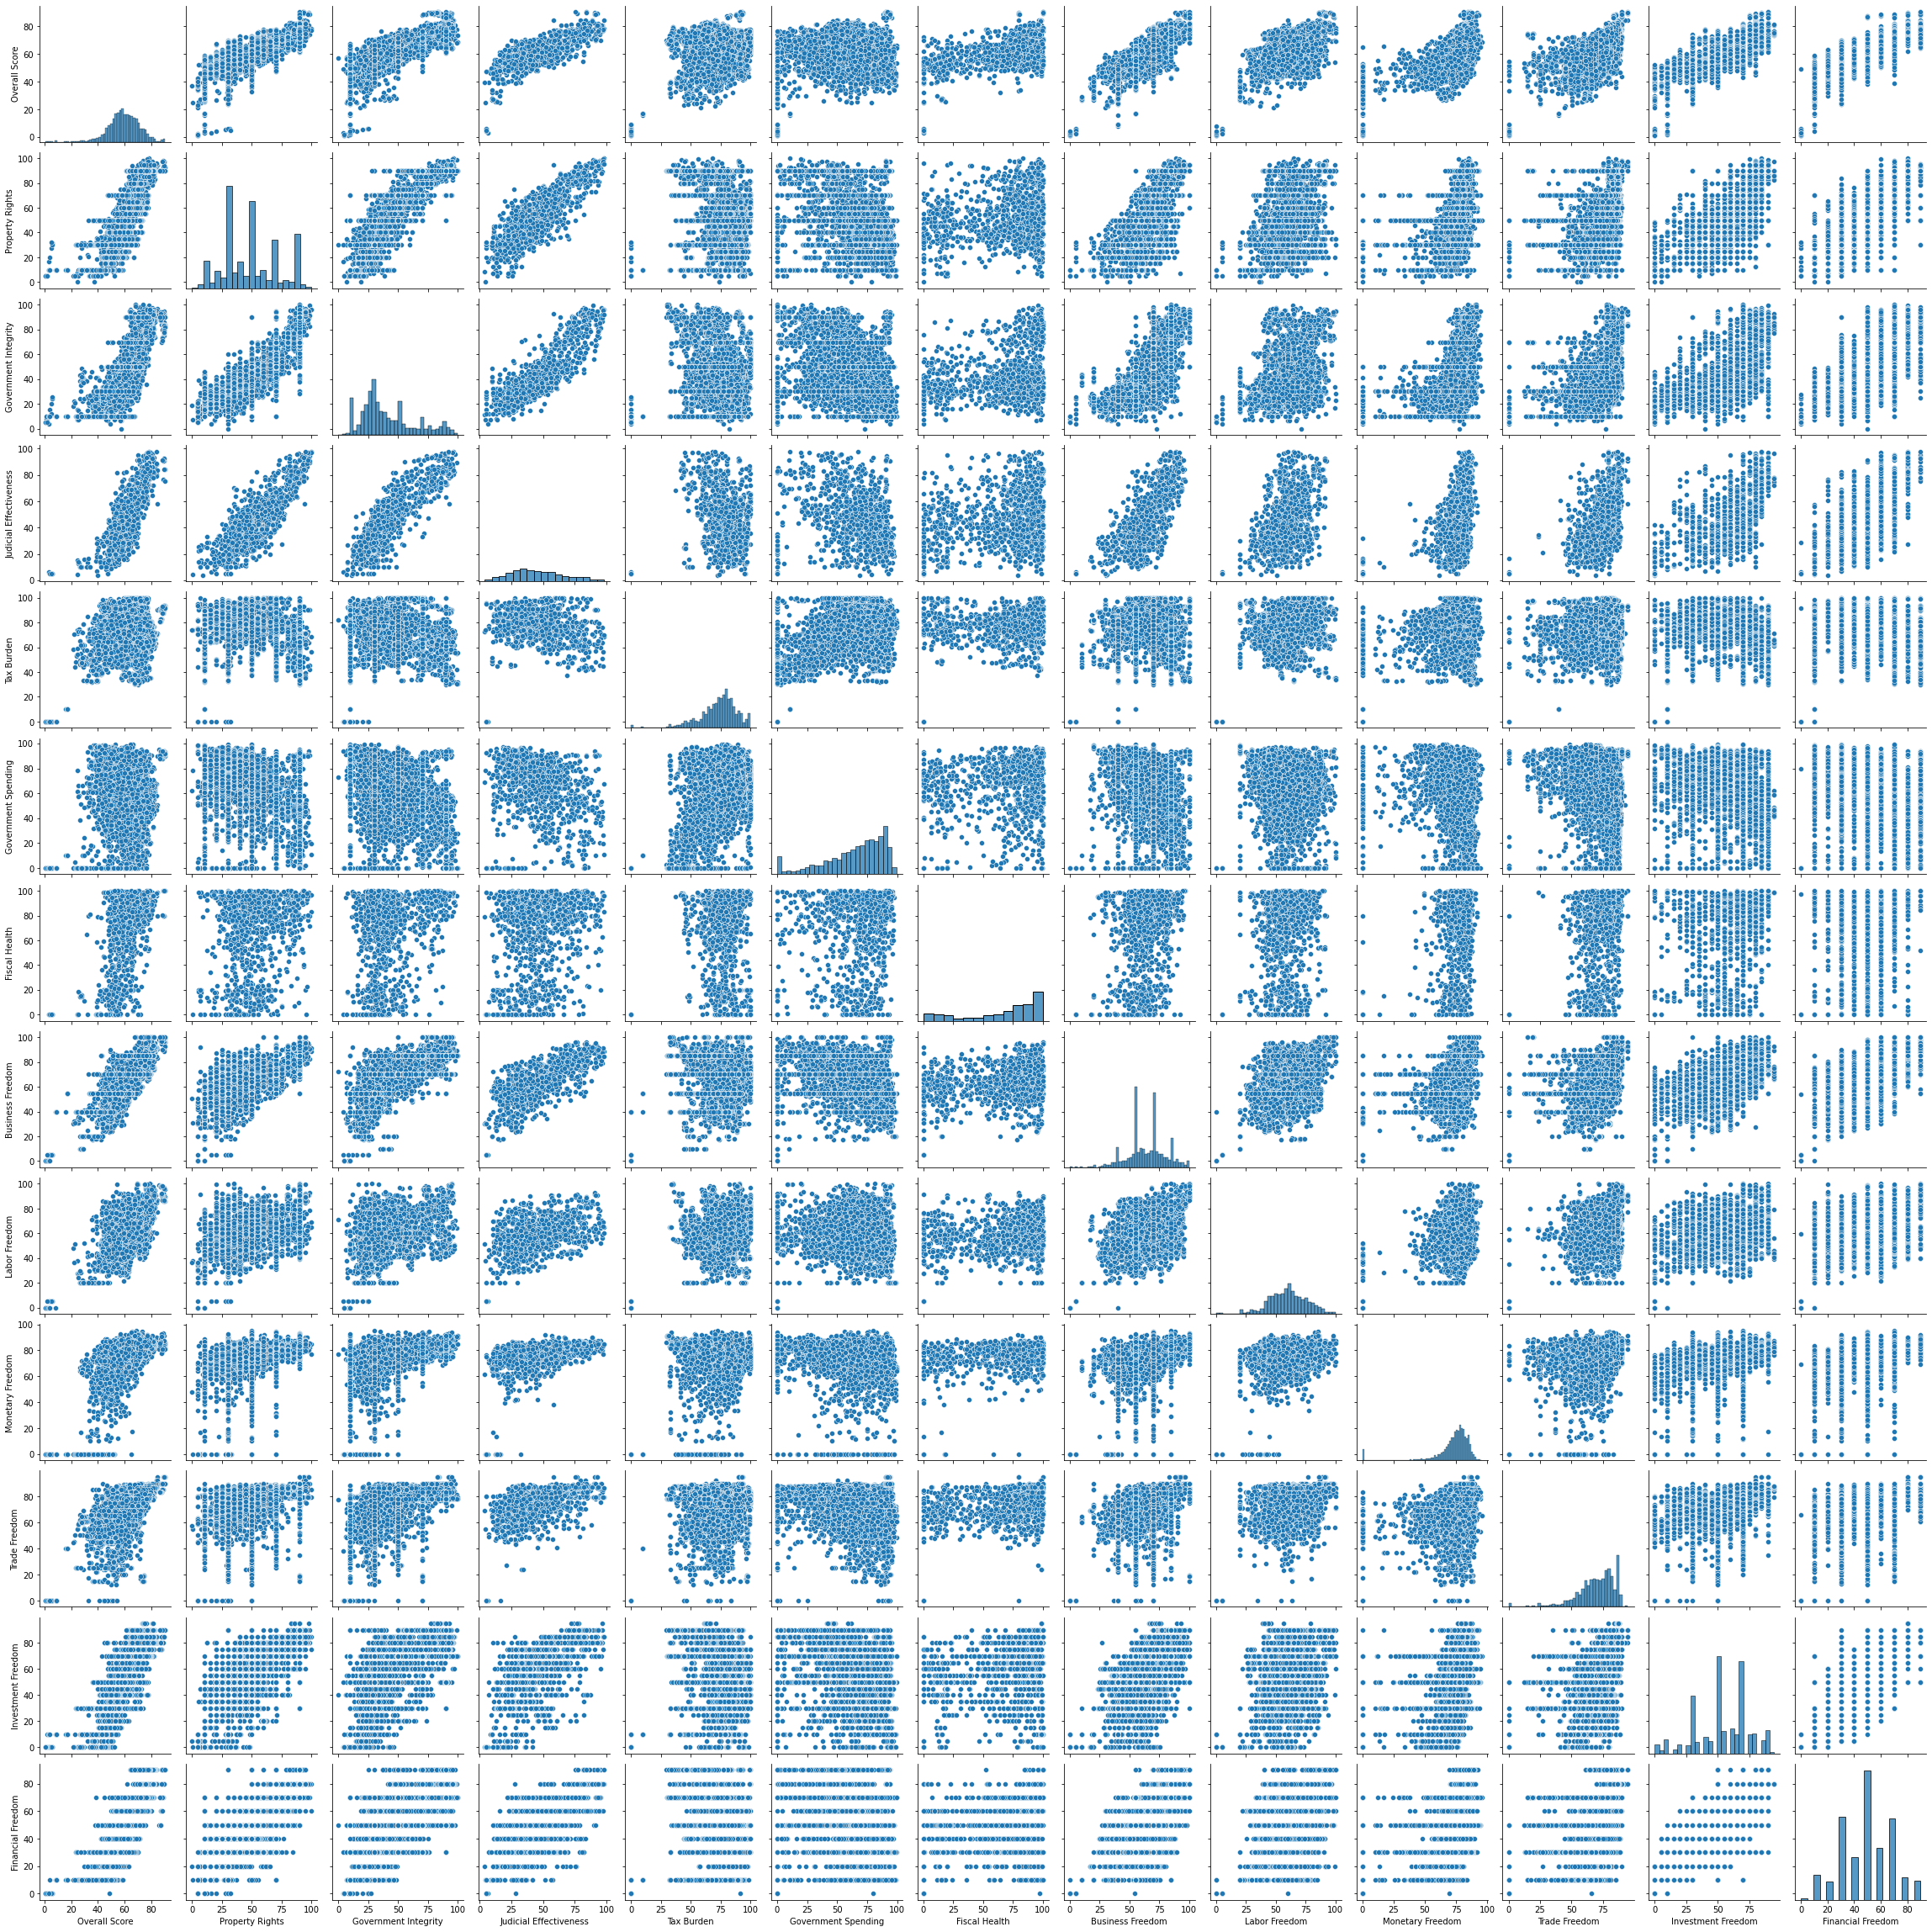

In [16]:
g = sns.pairplot(sub)

There seems to be greatest linearity and least variance in the variables property rights, government integrity, judicial effectiveness and business freedom. Those could be variables for further investigation.

### 06. Correlation matrix with pandas

In [17]:
df_freedom.corr()

,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
Latitude,1.000000,0.060181,-0.000594,0.156804,0.255903,0.269946,0.272275,-0.166711,-0.357143,0.181343,0.242781,0.013910,0.038119,0.240414,0.180655,0.192568
Longitude,0.060181,1.000000,0.002207,-0.048558,-0.014299,-0.011852,0.059530,0.016876,0.027730,0.009910,-0.012862,0.065922,-0.069444,-0.007545,-0.166833,-0.093598
Index Year,-0.000594,0.002207,1.000000,0.093325,-0.032969,0.049049,0.059367,0.281662,-0.014875,-0.011204,-0.030922,-0.061186,0.186081,0.333283,0.042033,-0.040942
Overall Score,0.156804,-0.048558,0.093325,1.000000,0.796744,0.761652,0.776623,0.260554,0.040083,0.495762,0.785286,0.562150,0.641565,0.627276,0.765553,0.799945
Property Rights,0.255903,-0.014299,-0.032969,0.796744,1.000000,0.848994,0.846305,-0.125893,-0.284994,0.259210,0.728725,0.369568,0.405262,0.405772,0.668867,0.675836
Government Integrity,0.269946,-0.011852,0.049049,0.761652,0.848994,1.000000,0.848180,-0.132510,-0.372150,0.235535,0.694464,0.357473,0.435541,0.468148,0.582793,0.619461
Judicial Effectiveness,0.272275,0.059530,0.059367,0.776623,0.846305,0.848180,1.000000,-0.167709,-0.260415,0.197891,0.708328,0.442639,0.441072,0.511242,0.576197,0.612944
Tax Burden,-0.166711,0.016876,0.281662,0.260554,-0.125893,-0.132510,-0.167709,1.000000,0.436554,0.043464,0.055398,0.214396,0.199652,0.227582,-0.028176,0.030521
Government Spending,-0.357143,0.027730,-0.014875,0.040083,-0.284994,-0.372150,-0.260415,0.436554,1.000000,0.104650,-0.182691,-0.023680,0.022189,-0.149717,-0.126087,-0.128432
Fiscal Health,0.181343,0.009910,-0.011204,0.495762,0.259210,0.235535,0.197891,0.043464,0.104650,1.000000,0.226345,0.157942,0.274577,0.284817,0.205416,0.192373


**Finanical Freedom** is most strongly correlated to the Overall Score with the correlation coefficient being 0,799945. However, data points beginning 2016 and earlier are N/A. Therefore it makes sense to further investigate the second strongest correlation, **Property Rights**, with a correlation coefficient of 0,796744 to Overall Score. For the catplot, however, it could be interesting to bring **Financial Freedom** back into the equation and further look how it is turning out.

### 07. Categorical plots with seaborn

<AxesSubplot:xlabel='Property Rights', ylabel='Count'>

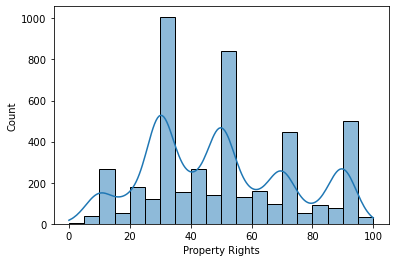

In [18]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_freedom['Property Rights'], bins = 20, kde = True)

In [19]:
# Creating a new column to categorize the scoring of "Property Rights"

df_freedom.loc[df_freedom['Property Rights'] < 40, 'Property Rights Category'] = 'Low Score'

In [20]:
df_freedom.loc[(df_freedom['Property Rights'] >= 40) & (df_freedom['Property Rights'] <70), 'Property Rights Category'] = 'Medium Score'

In [21]:
df_freedom.loc[df_freedom['Property Rights'] > 70, 'Property Rights Category'] = 'High Score'

In [22]:
# Counting the values of the new column "Property Rights Category"

df_freedom['Property Rights Category'].value_counts(dropna = False)

Low Score       1825
Medium Score    1629
NaN              905
High Score       793
Name: Property Rights Category, dtype: int64

In [23]:
# Checking if the new column "Property Rights Category" is there

df_freedom.columns

Index(['Name', 'Latitude', 'Longitude', 'Index Year', 'Overall Score',
       'Property Rights', 'Government Integrity', 'Judicial Effectiveness',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Property Rights Category'],
      dtype='object')

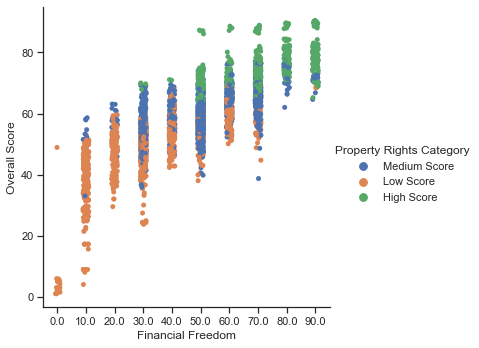

In [24]:
# Creating a categorical plot in seaborn using the property rights categories created above and "Financial Freedom" as x

sns.set(style="ticks")
g = sns.catplot(x="Financial Freedom", y="Overall Score", hue="Property Rights Category", data=df_freedom)

The catplot shows that there are instances where ther is a low score of Financial Freedom but a medium score of Property Rights (in the Financial Freedom scoring between 10 and 20). Furthermore, at 50, where the Financial Freedom scoring is relatively high, the Property Rights Category is medium for many instances. Also, at the high scoring of Financial Freedom of 90, there is one outlier with a low Property Rights score. 

### 08. Synopsis of the exploratory analysis

This exploratory analysis provided information for one question in my project brief:

**1. Is there a correlation between factors?**
Property Rights, Judicial Effectiveness, Government Integrity, Business Freedom, Investment Freedom and Financial Freedom show the most and strongest correlations (6 or more with a coefficient higher than 0,5). 

Based on the exploratory analysis, I formulate the **hypothesis**: "The higher the scoring for Property Rights, the higher the Overall Score for Economic Freedom".

### 09. Exporting the dataframe

In [25]:
# Creating a path

path = r'C:\Users\veren\Python Data\Economic Freedom Index'

In [26]:
df_freedom.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'data-economic-freedom-prights-category.xlsx'))